In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
df = pd.read_csv("trade_in_appraisal.csv",index_col=0)

In [16]:
import MeCab

In [17]:
df.head()

,date,rate,comment,result
3959,2024-04-03,5.0,頑張ってはくれようとするが、結果は伴わず最終提示の額も条件ありでした。期待するが残念な結果です。,0
3931,2024-04-03,5.0,誠実な対応と過不足ない説明で不安なく売却出来ました。,1
3930,2024-04-03,4.3,丁寧な対応で良かったが、買取価格は、ここで乗換えれば更に高くなるという条件付きだったのが残念...,0
3929,2024-04-03,4.8,最終的に決まらなかったものの、最後まで査定価格を上司に掛け合ってくれるなど熱意がよかった。,0
3928,2024-04-03,5.0,丁寧な対応で、こちらのワガママも聞いて頂いたうえに、価格も頑張ってくれて非常に良かった。,1


In [19]:
# MeCabで形態素解析を行う
import MeCab

def mecab_text(text):

    #MeCabのインスタンスを作成（辞書はmecab-ipadic-neologdを使用）
    mecab = MeCab.Tagger('-Owakati')

    #形態素解析
    text = str(text).lower() #　追加したところ
    node = mecab.parseToNode(text)

    #形態素解析した結果を格納するリスト
    wordlist = []

    while node:
        #名詞のみリストに格納する
        if node.feature.split(',')[0] == '名詞':
            wordlist.append(node.surface)
        #形容詞を取得、elifで追加する
        elif node.feature.split(',')[0] == '形容詞':
            wordlist.append(node.surface)
        #動詞を取得、elifで追加する
        #elif node.feature.split(',')[0] == '動詞':
            #wordlist.append(node.surface)
        node = node.next
    return wordlist

# 形態素結果をリスト化し、データフレームdf1に結果を列追加する
df['words_comment'] = df['comment'].apply(mecab_text)

In [20]:
import nlplot

In [24]:
npt_comment = nlplot.NLPlot(df, target_col='words_comment')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定
stopwords = npt_comment.get_stopword(top_n=0, min_freq=0)

npt_comment.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
)

100%|██████████| 3960/3960 [00:00<00:00, 167469.36it/s]


In [25]:
# 単語数の分布
npt_comment.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
    stopwords=stopwords,
)

100%|██████████| 3960/3960 [00:00<00:00, 175206.95it/s]


In [26]:
npt_comment.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

In [27]:
npt_comment.wordcloud(
    stopwords=stopwords,
    width=100,
    height=600,
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    mask_file=None,
    save=True
)

In [29]:
df1 = df[df["result"]==1]
df0 = df[df["result"]==0]

In [31]:
df1.describe()

,rate,result
count,2094.000000,2094.0
mean,4.818195,1.0
std,0.469996,0.0
min,0.300000,1.0
25%,5.000000,1.0
50%,5.000000,1.0
75%,5.000000,1.0
max,5.000000,1.0


In [32]:
df0.describe()

,rate,result
count,1866.000000,1866.0
mean,3.701018,0.0
std,1.405727,0.0
min,0.000000,0.0
25%,2.700000,0.0
50%,4.200000,0.0
75%,5.000000,0.0
max,5.000000,0.0


,date,rate,comment,result,words_comment
3959,2024-04-03,5.0,頑張ってはくれようとするが、結果は伴わず最終提示の額も条件ありでした。期待するが残念な結果です。,0,"[結果, 最終, 提示, 額, 条件, あり, 期待, 結果]"
3930,2024-04-03,4.3,丁寧な対応で良かったが、買取価格は、ここで乗換えれば更に高くなるという条件付きだったのが残念...,0,"[対応, 良かっ, 買取, 価格, 高く, 条件]"
3929,2024-04-03,4.8,最終的に決まらなかったものの、最後まで査定価格を上司に掛け合ってくれるなど熱意がよかった。,0,"[最終, もの, 最後, 査定, 価格, 上司, 熱意, よかっ]"
3926,2024-04-03,5.0,ネクステージ姫路店 廣瀬さんに査定して頂きました。欲しい車があったのですが、タイミング合わず...,0,"[ネクステージ, 姫路, 廣瀬, 査定, 欲しい, 車, タイミング, 見送り, 査定, 感..."
3924,2024-04-03,5.0,丁寧に対応していただき店舗の雰囲気も良かったです。,0,"[対応, 店舗, 雰囲気, 良かっ]"


Text(0, 0.5, 'Number of reviews')

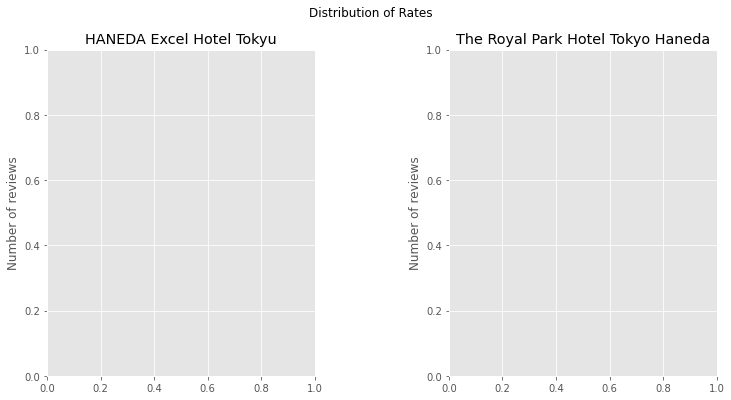

In [50]:
values_1, counts_1 = np.unique(df1['rate'], return_counts=True)
values_2, counts_2 = np.unique(df0['rate'], return_counts=True)
x1 = np.array(values_1)
x2 = np.array(values_2)
y1 = np.array(counts_1)
y2 = np.array(counts_2)

fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.suptitle('Distribution of Rates')
ax1.set_title('HANEDA Excel Hotel Tokyu')
ax2.set_title('The Royal Park Hotel Tokyo Haneda')

ax1.set_ylabel('Number of reviews')
ax2.set_ylabel('Number of reviews')


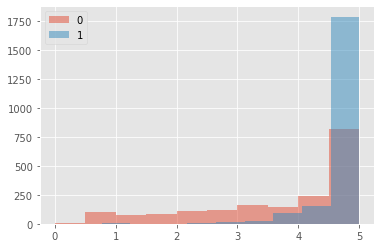

In [52]:
plt.hist(df0["rate"],label="0",alpha=0.5)
plt.hist(df1["rate"],label="1",alpha=0.5)
plt.legend()
plt.show()

In [62]:
# Create new column "Target" that stored 0's or 1's. 0 being Negative, 1 being Positive
df1["Target"] = np.where(df1["rate"] >= 4, 1, 0)
df0["Target"] = np.where(df0["rate"] >= 4, 1, 0)

# Picking the only text and target column
df1_final = df1[['comment']]
df0_final = df0[['comment']]
df3_final = df[['comment','result']]

/var/folders/84/r3ff3p5977l5y2fvhc9v0xxh0000gn/T/ipykernel_20577/679246003.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/84/r3ff3p5977l5y2fvhc9v0xxh0000gn/T/ipykernel_20577/679246003.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
df1_final.head()

,comment
3931,誠実な対応と過不足ない説明で不安なく売却出来ました。
3928,丁寧な対応で、こちらのワガママも聞いて頂いたうえに、価格も頑張ってくれて非常に良かった。
3927,ビックモーター白浜店の梶原さんに査定して頂き、かなり頑張って下さいました。あと、欲しい車と下...
3925,買取価格が一番高かったので買取していただきました。買取の手続きも丁寧に教えていただきスムーズ...
3923,神奈川まで来て貰え、納税負担ではあったが手元に納得いく金額を残して貰えた。営業の方が雨で寒い...


In [65]:
df3_final.head()

,comment,result
3959,頑張ってはくれようとするが、結果は伴わず最終提示の額も条件ありでした。期待するが残念な結果です。,0
3931,誠実な対応と過不足ない説明で不安なく売却出来ました。,1
3930,丁寧な対応で良かったが、買取価格は、ここで乗換えれば更に高くなるという条件付きだったのが残念...,0
3929,最終的に決まらなかったものの、最後まで査定価格を上司に掛け合ってくれるなど熱意がよかった。,0
3928,丁寧な対応で、こちらのワガママも聞いて頂いたうえに、価格も頑張ってくれて非常に良かった。,1
